In [82]:
# ================================
# 1. IMPORT LIBRARY
# ================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [83]:
# ================================
# 2. LOAD DATASET
# ================================
# Baca file Excel, mulai dari baris ke-4 karena baris sebelumnya adalah header tambahan
df = pd.read_excel("Data KPM BANSOS.xlsx", skiprows=3)
df.columns = df.columns.str.strip()  # Hilangkan spasi di nama kolom

In [84]:
print("📄 isi dataset setelah dibaca:")
print("Jumlah baris dan kolom:", df.shape)
print("Nama-nama kolom:", df.columns.tolist())
df.head()


📄 isi dataset setelah dibaca:
Jumlah baris dan kolom: (497, 6)
Nama-nama kolom: ['NO', 'NIK', 'NAMA', 'ALAMAT', 'KATEGORI', 'PENDAPATAN']


,NO,NIK,NAMA,ALAMAT,KATEGORI,PENDAPATAN
0,1,1301021302680002,SYAFRIL,KILOMETER 11,SANGAT MISKIN,1000000
1,2,1301026208750001,ASMA NELI GUSTATI,PADANG LABAN,MISKIN,1000000
2,3,1301020511030001,M. HABIB ABDULLAH RAHMADANI,PADANG LABAN,RENTAN MISKIN,1000000
3,4,1301022405980001,SYUKRI KURNIAWAN,PADANG LABAN,HAMPIR MISKIN,1000000
4,5,1301027112760002,SUARNI,BANDAR BARU,SANGAT MISKIN,1500000


In [85]:
# ================================
# 3. PREPROCESSING DATA
# ================================
# Hapus kolom yang tidak dibutuhkan untuk analisis SVM
df = df.drop(columns=['NO', 'NIK', 'NAMA', 'ALAMAT'])

# Bersihkan dan ubah nilai pendapatan ke format float
df['PENDAPATAN'] = df['PENDAPATAN'].astype(str)  # Ubah ke string dulu
df['PENDAPATAN'] = df['PENDAPATAN'].str.replace('Rp', '', regex=False)  # Hapus "Rp"
df['PENDAPATAN'] = df['PENDAPATAN'].str.replace('.', '', regex=False)   # Hapus titik ribuan
df['PENDAPATAN'] = df['PENDAPATAN'].str.replace(',', '.', regex=False)  # Ganti koma jadi titik
df['PENDAPATAN'] = df['PENDAPATAN'].astype(float)  # Ubah ke float

In [86]:
print("✅ Kolom setelah dibersihkan:")
print("Kolom yang tersisa:", df.columns.tolist())
print(df.head())

print(df['PENDAPATAN'].describe())  # opsional, buat lihat ringkasan statistik

✅ Kolom setelah dibersihkan:
Kolom yang tersisa: ['KATEGORI', 'PENDAPATAN']
        KATEGORI  PENDAPATAN
0  SANGAT MISKIN   1000000.0
1         MISKIN   1000000.0
2  RENTAN MISKIN   1000000.0
3  HAMPIR MISKIN   1000000.0
4  SANGAT MISKIN   1500000.0
count    4.970000e+02
mean     1.231388e+06
std      1.873539e+05
min      1.000000e+06
25%      1.000000e+06
50%      1.200000e+06
75%      1.400000e+06
max      1.500000e+06
Name: PENDAPATAN, dtype: float64


In [87]:
# ================================
# 4. PISAHKAN FITUR DAN LABEL
# ================================
X = df[['PENDAPATAN']]        # Fitur (input model)
y = df['KATEGORI']            # Label (target yang ingin diprediksi)

In [88]:
print("Shape fitur (X):", X.shape)
print("Shape label (y):", y.shape)

print("Fitur (X):")
print(X.head())

print("\nLabel (y):")
print(y.head())


Shape fitur (X): (497, 1)
Shape label (y): (497,)
Fitur (X):
   PENDAPATAN
0   1000000.0
1   1000000.0
2   1000000.0
3   1000000.0
4   1500000.0

Label (y):
0    SANGAT MISKIN
1           MISKIN
2    RENTAN MISKIN
3    HAMPIR MISKIN
4    SANGAT MISKIN
Name: KATEGORI, dtype: object


In [89]:
# ================================
# 5. ENCODING LABEL (STRING KE ANGKA)
# ================================
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Ubah label string jadi angka
# Tampilkan mapping label string ke angka
print("Mapping Label:", dict(zip(le.classes_, le.transform(le.classes_))))
print("Contoh hasil encoding label (5 data pertama):", y_encoded[:5])


Mapping Label: {'HAMPIR MISKIN': 0, 'MISKIN': 1, 'RENTAN MISKIN': 2, 'SANGAT MISKIN': 3}
Contoh hasil encoding label (5 data pertama): [3 1 2 0 3]


In [90]:
# ================================
# 6. SPLIT DATA: TRAINING DAN TESTING
# ================================
# Bagi data menjadi 80% training dan 20% testing, stratify agar distribusi label merata
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [91]:
# Tampilkan jumlah data training dan testing
print("Jumlah data training:", len(X_train))
print("Jumlah data testing :", len(X_test))

# Tampilkan 5 data pertama dari training dan testing
print("\nContoh data training:")
print(X_train.head())
print("Label training:", y_train[:5])

print("\nContoh data testing:")
print(X_test.head())
print("Label testing:", y_test[:5])


Jumlah data training: 397
Jumlah data testing : 100

Contoh data training:
     PENDAPATAN
325   1500000.0
260   1000000.0
432   1200000.0
406   1200000.0
106   1500000.0
Label training: [3 3 0 1 3]

Contoh data testing:
     PENDAPATAN
355   1400000.0
175   1200000.0
388   1300000.0
455   1400000.0
471   1000000.0
Label testing: [3 1 1 2 2]


In [92]:
# ================================
# 7. NORMALISASI FITUR
# ================================
# Gunakan StandardScaler karena SVM sensitif terhadap skala fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Normalisasi seluruh X untuk keperluan visualisasi PCA
scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X)

In [93]:
# Tampilkan ringkasan statistik sebelum normalisasi
print("\n📊 Statistik Pendapatan Sebelum Normalisasi:")
print(X_train.describe())

# Tampilkan contoh hasil normalisasi
print("\n📈 Contoh 5 Data Training Setelah Normalisasi:")
print(X_train_scaled[:5])

# Tampilkan rata-rata dan standar deviasi setelah normalisasi
print("\n📉 Rata-rata dan Std setelah normalisasi (seharusnya ~0 dan ~1):")
print("Mean :", X_train_scaled.mean())
print("Std  :", X_train_scaled.std())



📊 Statistik Pendapatan Sebelum Normalisasi:
         PENDAPATAN
count  3.970000e+02
mean   1.231738e+06
std    1.886964e+05
min    1.000000e+06
25%    1.000000e+06
50%    1.200000e+06
75%    1.400000e+06
max    1.500000e+06

📈 Contoh 5 Data Training Setelah Normalisasi:
[[ 1.42345337]
 [-1.22964986]
 [-0.16840857]
 [-0.16840857]
 [ 1.42345337]]

📉 Rata-rata dan Std setelah normalisasi (seharusnya ~0 dan ~1):
Mean : -1.5101270360140668e-16
Std  : 1.0000000000000002


In [94]:
# ================================
# 8. TRAINING DAN EVALUASI SVM DENGAN BERBAGAI KERNEL
# ================================
# Coba 4 jenis kernel SVM: linear, RBF, sigmoid, polynomial
# Inisialisasi penyimpanan hasil
models = {}
y_preds = {}
conf_matrices = {}
accuracies = {}

# ========================
# 🔹 Kernel: LINEAR
# ========================
print("\n🔹 Evaluasi SVM Kernel: LINEAR")
model_linear = SVC(kernel='linear', C=1.0, gamma='scale')
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)
models['linear'] = model_linear
y_preds['linear'] = y_pred_linear
conf_matrices['linear'] = confusion_matrix(y_test, y_pred_linear)
accuracies['linear'] = accuracy_score(y_test, y_pred_linear)
print(classification_report(y_test, y_pred_linear, target_names=le.classes_, zero_division=0))
print("Confusion Matrix:\n", conf_matrices['linear'])
print(f"🔸 Akurasi: {accuracies['linear']*100:.2f}%")



🔹 Evaluasi SVM Kernel: LINEAR
               precision    recall  f1-score   support

HAMPIR MISKIN       0.30      0.52      0.38        25
       MISKIN       0.30      0.68      0.42        25
RENTAN MISKIN       0.00      0.00      0.00        22
SANGAT MISKIN       0.00      0.00      0.00        28

     accuracy                           0.30       100
    macro avg       0.15      0.30      0.20       100
 weighted avg       0.15      0.30      0.20       100

Confusion Matrix:
 [[13 12  0  0]
 [ 8 17  0  0]
 [ 9 13  0  0]
 [14 14  0  0]]
🔸 Akurasi: 30.00%


In [95]:
# ========================
# 🔹 Kernel: RBF
# ========================
print("\n🔹 Evaluasi SVM Kernel: RBF")
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = model_rbf.predict(X_test_scaled)
models['rbf'] = model_rbf
y_preds['rbf'] = y_pred_rbf
conf_matrices['rbf'] = confusion_matrix(y_test, y_pred_rbf)
accuracies['rbf'] = accuracy_score(y_test, y_pred_rbf)
print(classification_report(y_test, y_pred_rbf, target_names=le.classes_, zero_division=0))
print("Confusion Matrix:\n", conf_matrices['rbf'])
print(f"🔸 Akurasi: {accuracies['rbf']*100:.2f}%")


🔹 Evaluasi SVM Kernel: RBF
               precision    recall  f1-score   support

HAMPIR MISKIN       0.58      0.28      0.38        25
       MISKIN       0.47      0.36      0.41        25
RENTAN MISKIN       0.18      0.14      0.15        22
SANGAT MISKIN       0.31      0.57      0.40        28

     accuracy                           0.35       100
    macro avg       0.39      0.34      0.34       100
 weighted avg       0.39      0.35      0.34       100

Confusion Matrix:
 [[ 7  4  1 13]
 [ 3  9  5  8]
 [ 2  2  3 15]
 [ 0  4  8 16]]
🔸 Akurasi: 35.00%


In [96]:
# ========================
# 🔹 Kernel: SIGMOID
# ========================
print("\n🔹 Evaluasi SVM Kernel: SIGMOID")
model_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='scale')
model_sigmoid.fit(X_train_scaled, y_train)
y_pred_sigmoid = model_sigmoid.predict(X_test_scaled)
models['sigmoid'] = model_sigmoid
y_preds['sigmoid'] = y_pred_sigmoid
conf_matrices['sigmoid'] = confusion_matrix(y_test, y_pred_sigmoid)
accuracies['sigmoid'] = accuracy_score(y_test, y_pred_sigmoid)
print(classification_report(y_test, y_pred_sigmoid, target_names=le.classes_, zero_division=0))
print("Confusion Matrix:\n", conf_matrices['sigmoid'])
print(f"🔸 Akurasi: {accuracies['sigmoid']*100:.2f}%")


🔹 Evaluasi SVM Kernel: SIGMOID
               precision    recall  f1-score   support

HAMPIR MISKIN       0.21      0.40      0.28        25
       MISKIN       0.19      0.40      0.26        25
RENTAN MISKIN       0.00      0.00      0.00        22
SANGAT MISKIN       0.00      0.00      0.00        28

     accuracy                           0.20       100
    macro avg       0.10      0.20      0.13       100
 weighted avg       0.10      0.20      0.13       100

Confusion Matrix:
 [[10 15  0  0]
 [15 10  0  0]
 [ 5 17  0  0]
 [17 11  0  0]]
🔸 Akurasi: 20.00%


In [97]:
# ========================
# 🔹 Kernel: POLY
# ========================
print("\n🔹 Evaluasi SVM Kernel: POLY")
model_poly = SVC(kernel='poly', C=1.0, gamma='scale')
model_poly.fit(X_train_scaled, y_train)
y_pred_poly = model_poly.predict(X_test_scaled)
models['poly'] = model_poly
y_preds['poly'] = y_pred_poly
conf_matrices['poly'] = confusion_matrix(y_test, y_pred_poly)
accuracies['poly'] = accuracy_score(y_test, y_pred_poly)
print(classification_report(y_test, y_pred_poly, target_names=le.classes_, zero_division=0))
print("Confusion Matrix:\n", conf_matrices['poly'])
print(f"🔸 Akurasi: {accuracies['poly']*100:.2f}%")


🔹 Evaluasi SVM Kernel: POLY
               precision    recall  f1-score   support

HAMPIR MISKIN       0.00      0.00      0.00        25
       MISKIN       0.00      0.00      0.00        25
RENTAN MISKIN       0.00      0.00      0.00        22
SANGAT MISKIN       0.28      1.00      0.44        28

     accuracy                           0.28       100
    macro avg       0.07      0.25      0.11       100
 weighted avg       0.08      0.28      0.12       100

Confusion Matrix:
 [[ 0  0  0 25]
 [ 0  0  0 25]
 [ 0  0  0 22]
 [ 0  0  0 28]]
🔸 Akurasi: 28.00%


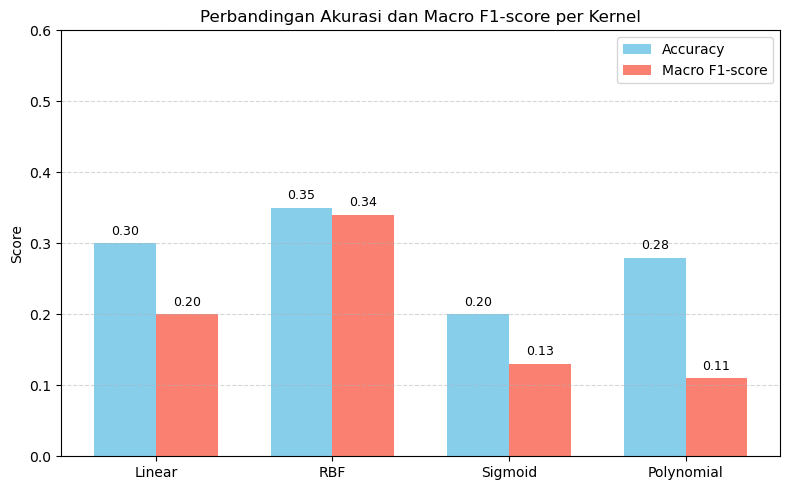

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai evaluasi per kernel
kernels = ['Linear', 'RBF', 'Sigmoid', 'Polynomial']
accuracy = [0.30, 0.35, 0.20, 0.28]
macro_f1 = [0.20, 0.34, 0.13, 0.11]  # macro avg f1 dari output Ayang

x = np.arange(len(kernels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, macro_f1, width, label='Macro F1-score', color='salmon')

# Menambahkan teks nilai di atas bar
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Pengaturan sumbu dan label
ax.set_ylabel('Score')
ax.set_title('Perbandingan Akurasi dan Macro F1-score per Kernel')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()
ax.set_ylim(0, 0.6)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


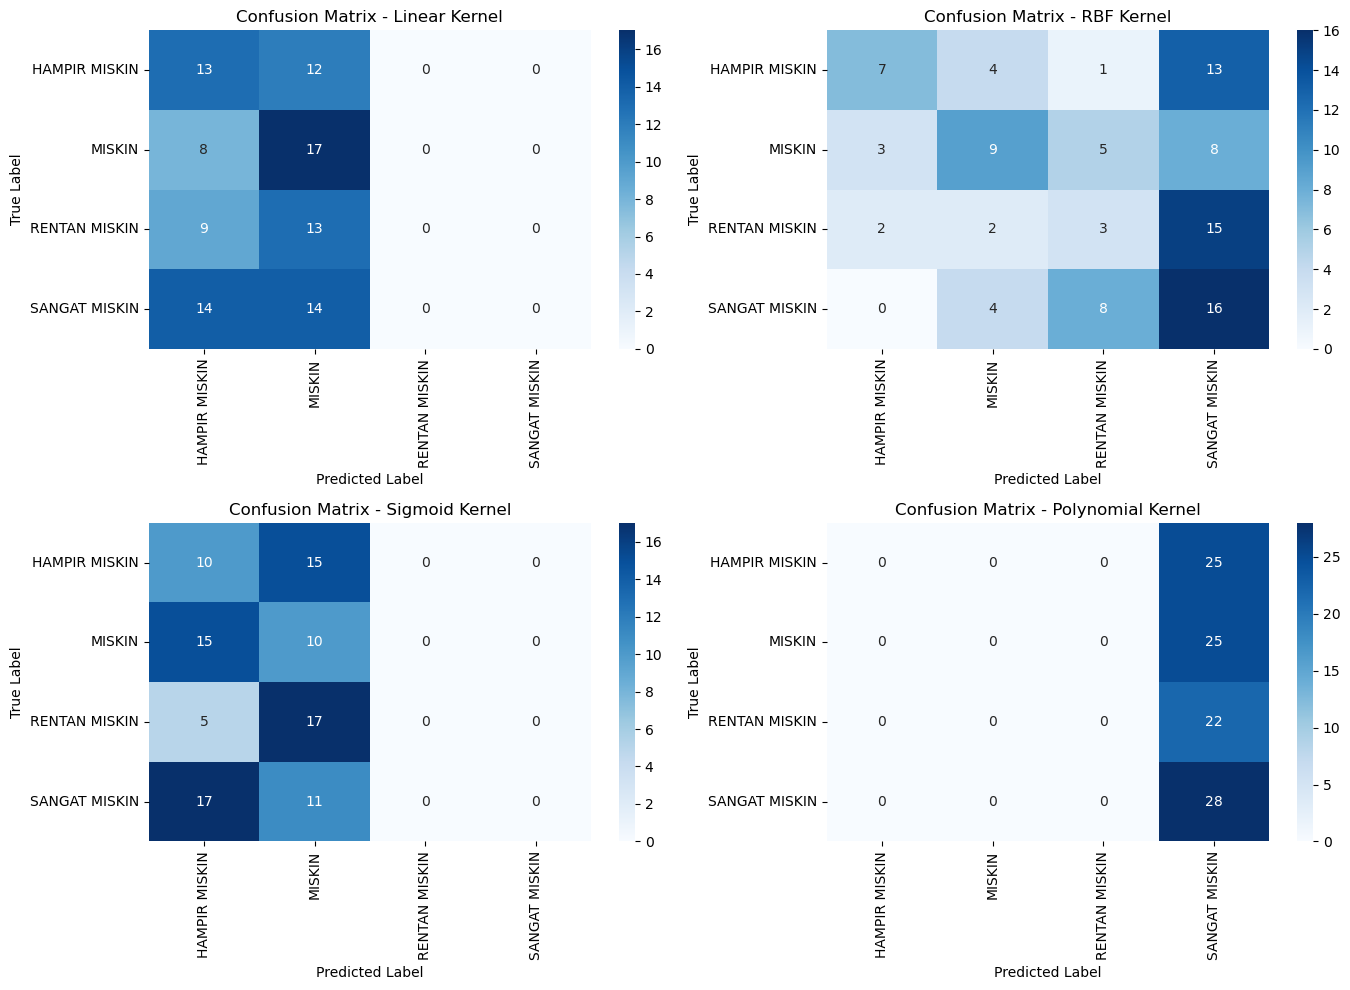

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Daftar kernel SVM yang digunakan
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
kernel_titles = ['Linear', 'RBF', 'Sigmoid', 'Polynomial']

# Buat figure dengan 2 baris dan 2 kolom subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()  # Ubah jadi array 1 dimensi biar mudah diakses

for i, kernel in enumerate(kernels):
    # Inisialisasi dan training model
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train_scaled, y_train)
    
    # Prediksi dan buat confusion matrix
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_,
                ax=axs[i])
    axs[i].set_title(f'Confusion Matrix - {kernel_titles[i]} Kernel')
    axs[i].set_xlabel('Predicted Label')
    axs[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()


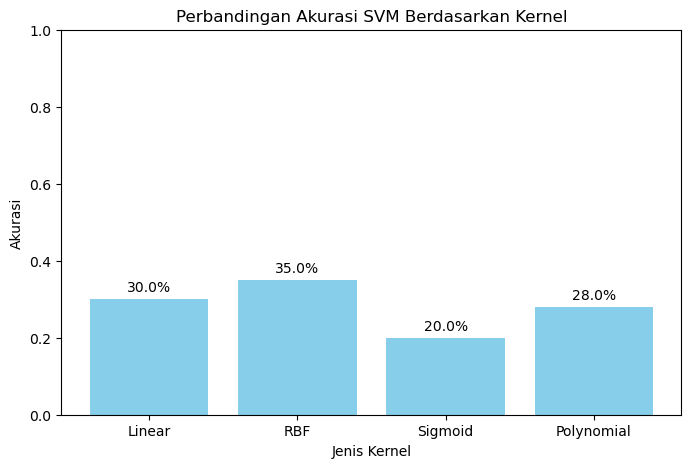

In [100]:
import matplotlib.pyplot as plt

# Akurasi dari hasil evaluasi sebelumnya
akurasi_kernels = [0.30, 0.35, 0.20, 0.28]  # Linear, RBF, Sigmoid, Poly
kernel_names = ['Linear', 'RBF', 'Sigmoid', 'Polynomial']

plt.figure(figsize=(8, 5))
bars = plt.bar(kernel_names, akurasi_kernels, color='skyblue')
plt.ylim(0, 1)
plt.title('Perbandingan Akurasi SVM Berdasarkan Kernel')
plt.ylabel('Akurasi')
plt.xlabel('Jenis Kernel')

# Tampilkan persentase di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval*100:.1f}%', ha='center', fontsize=10)

plt.show()


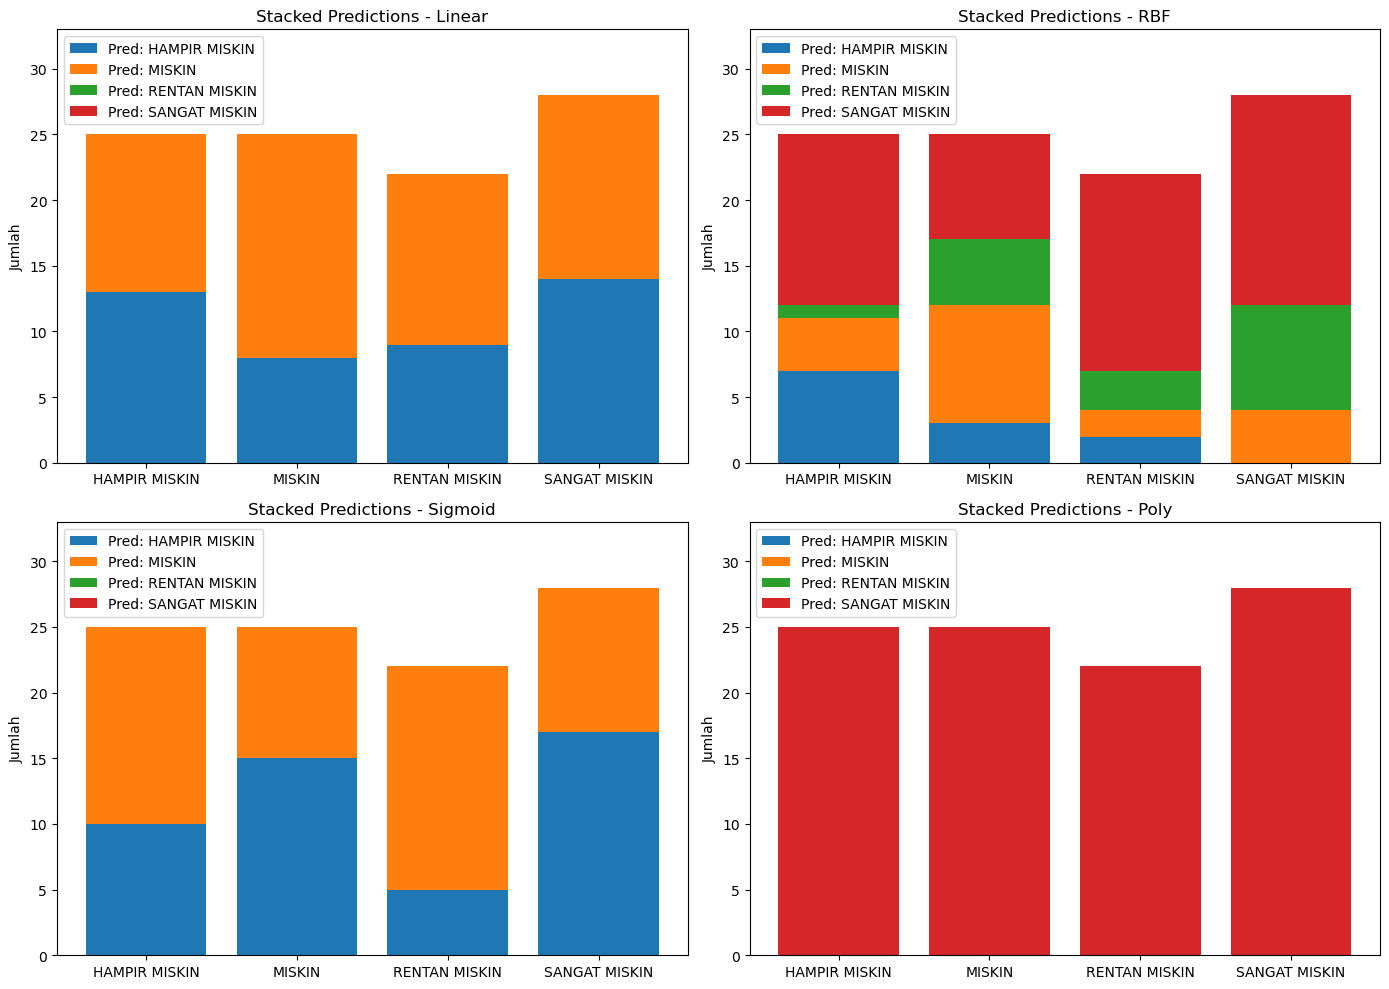

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Label kelas
labels = ['HAMPIR MISKIN', 'MISKIN', 'RENTAN MISKIN', 'SANGAT MISKIN']

# Confusion matrix tiap kernel (baris: label asli, kolom: prediksi)
conf_matrices = {
    'Linear': np.array([[13, 12, 0, 0], [8, 17, 0, 0], [9, 13, 0, 0], [14, 14, 0, 0]]),
    'RBF':    np.array([[7, 4, 1, 13], [3, 9, 5, 8], [2, 2, 3, 15], [0, 4, 8, 16]]),
    'Sigmoid':np.array([[10, 15, 0, 0], [15, 10, 0, 0], [5, 17, 0, 0], [17, 11, 0, 0]]),
    'Poly':   np.array([[0, 0, 0, 25], [0, 0, 0, 25], [0, 0, 0, 22], [0, 0, 0, 28]])
}

# Buat stacked bar plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, (kernel, cm) in enumerate(conf_matrices.items()):
    ax = axes[i]
    ax.set_title(f'Stacked Predictions - {kernel}')
    bottoms = np.zeros(len(labels))
    for pred_kelas in range(cm.shape[1]):
        ax.bar(labels, cm[:, pred_kelas], bottom=bottoms, label=f'Pred: {labels[pred_kelas]}')
        bottoms += cm[:, pred_kelas]

    ax.set_ylabel('Jumlah')
    ax.legend()
    ax.set_ylim(0, max(bottoms) + 5)

plt.tight_layout()
plt.show()


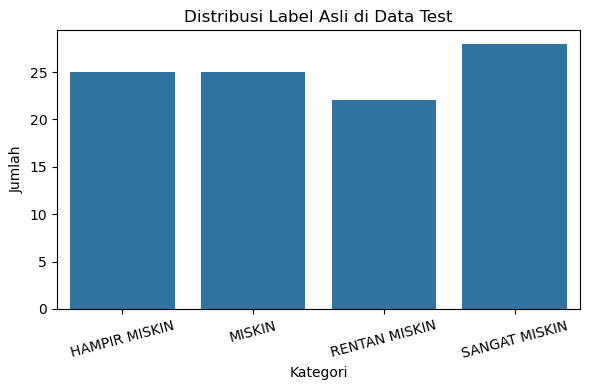

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat DataFrame dari y_test yang sudah didekode ke label aslinya
y_test_labels = le.inverse_transform(y_test)
df_test = pd.DataFrame({'Label': y_test_labels})

plt.figure(figsize=(6,4))
sns.countplot(data=df_test, x='Label', order=le.classes_)
plt.title("Distribusi Label Asli di Data Test")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


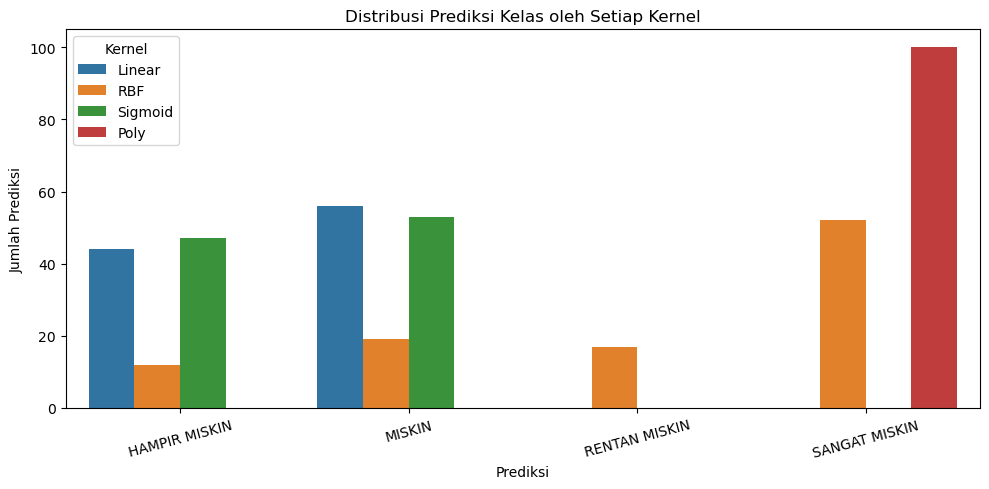

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat fungsi pembantu
def get_prediction_distribution(pred, name):
    labels = le.inverse_transform(pred)
    return pd.DataFrame({'Prediksi': labels, 'Kernel': name})

# Gabungkan semua prediksi dari dictionary y_preds
df_pred_all = pd.concat([
    get_prediction_distribution(y_preds['linear'], 'Linear'),
    get_prediction_distribution(y_preds['rbf'], 'RBF'),
    get_prediction_distribution(y_preds['sigmoid'], 'Sigmoid'),
    get_prediction_distribution(y_preds['poly'], 'Poly'),
])

# Visualisasikan
plt.figure(figsize=(10, 5))
sns.countplot(data=df_pred_all, x='Prediksi', hue='Kernel', order=le.classes_)
plt.title("Distribusi Prediksi Kelas oleh Setiap Kernel")
plt.ylabel("Jumlah Prediksi")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


NameError: name 'load_and_prepare' is not defined